In [4]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 36.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 25.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [3]:
import pandas as pd
train_df = pd.read_csv('file/train.csv')
test_df = pd.read_csv('file/test.csv')
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df['Age_Group'] = train_df['Age'].apply(lambda x: 'Adult' if x >= 20 else 'Kid')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Kid
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Kid
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [16]:
train_df.groupby(['Sex','Age_Group','Survived'])['Survived'].count()

Sex     Age_Group  Survived
female  Adult      0            42
                   1           144
        Kid        0            39
                   1            89
male    Adult      0           297
                   1            67
        Kid        0           171
                   1            42
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

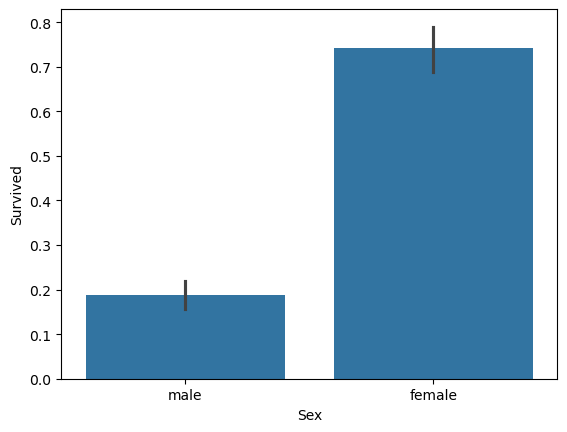

In [17]:
sns.barplot(data=train_df,x='Sex',y='Survived')

In [18]:
def get_age_category(age)-> str:
    if np.isnan(age) :
        return 'Unknown'
    elif age <=5:
        return 'Baby'
    elif age <=12:
        return 'Child'
    elif age <=18:
        return 'Teenager'
    elif age <=25:
        return 'Student'
    elif age <=35:
        return 'Young Adult'
    elif age <=60:
        return 'Adult'
    else:
        return 'Elderly'

In [20]:
train_df['Age_category']=train_df['Age'].apply(lambda age: get_age_category(age))
print(f"{train_df['Age_category']}")

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Unknown
889    Young Adult
890    Young Adult
Name: Age_category, Length: 891, dtype: object


Age_category
Young Adult    196
Adult          195
Unknown        177
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: count, dtype: int64


<Axes: xlabel='Age_category', ylabel='Survived'>

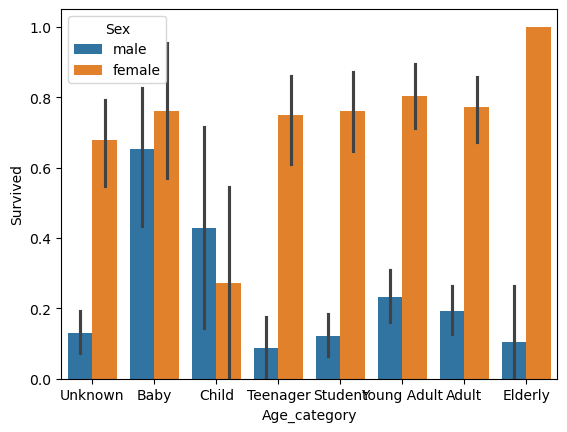

In [22]:
print(f"{train_df['Age_category'].value_counts()}")
age_order=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

sns.barplot(data=train_df,x='Age_category',y='Survived', order=age_order, hue='Sex')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
train_df = pd.read_csv('file/train.csv')

# 데이터 전처리
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())  # Age 열의 결측값을 중앙값으로 채움
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])  # Embarked 열의 결측값을 최빈값으로 채움
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())  # Fare 열의 결측값을 중앙값으로 채움

# 범주형 데이터 인코딩
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)  # Sex와 Embarked 열을 원-핫 인코딩

# 특징과 타겟 변수 설정
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]  # 특징 변수 설정
y = train_df['Survived']  # 타겟 변수 설정

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 학습 데이터와 테스트 데이터로 분할

# 데이터 스케일링
scaler = StandardScaler()  # 스케일러 객체 생성
X_train = scaler.fit_transform(X_train)  # 학습 데이터 스케일링
X_test = scaler.transform(X_test)  # 테스트 데이터 스케일링

# 모델 초기화
log_reg = LogisticRegression()  # 로지스틱 회귀 모델 생성
rf_clf = RandomForestClassifier()  # 랜덤 포레스트 모델 생성
svm_clf = SVC()  # 서포트 벡터 머신 모델 생성

# 모델 학습
log_reg.fit(X_train, y_train)  # 로지스틱 회귀 모델 학습
rf_clf.fit(X_train, y_train)  # 랜덤 포레스트 모델 학습
svm_clf.fit(X_train, y_train)  # 서포트 벡터 머신 모델 학습

# 예측
log_reg_pred = log_reg.predict(X_test)  # 로지스틱 회귀 모델로 예측
rf_clf_pred = rf_clf.predict(X_test)  # 랜덤 포레스트 모델로 예측
svm_clf_pred = svm_clf.predict(X_test)  # 서포트 벡터 머신 모델로 예측

# 결과 평가
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))  # 로지스틱 회귀 모델의 정확도 출력
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf_pred))  # 랜덤 포레스트 모델의 정확도 출력
print("SVM Accuracy:", accuracy_score(y_test, svm_clf_pred))  # 서포트 벡터 머신 모델의 정확도 출력

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))  # 로지스틱 회귀 모델의 분류 보고서 출력
print("Random Forest Classification Report:\n", classification_report(y_test, rf_clf_pred))  # 랜덤 포레스트 모델의 분류 보고서 출력
print("SVM Classification Report:\n", classification_report(y_test, svm_clf_pred))  # 서포트 벡터 머신 모델의 분류 보고서 출력

Logistic Regression Accuracy: 0.8100558659217877
Random Forest Accuracy: 0.8212290502793296
SVM Accuracy: 0.8212290502793296

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
 